In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

%matplotlib inline

# The Human Eye

In [2]:
def optimal_dist(size, resolution, max_dist):
    max_spatial_freq = 60
    d = size[0]/(2*np.tan(resolution[0]/(2*max_spatial_freq)))
    return d if (d<max_dist) else max_dist

In [3]:
size = (32, 24) # in Inch
resolution = (1920, 1080)
available_distance = 60 # in Inch
print("A couch at a distance of {} inches from TV will have very high contrast sensitivity.".format(np.round(optimal_dist(size, resolution, available_distance), 2)))

A couch at a distance of 53.22 inches from TV will have very high contrast sensitivity.


# Gray Scale Images

In [4]:
img_airplane = mpimg.imread("../misc/5.1.11.tiff")
img_apc = mpimg.imread("../misc/7.1.08.tiff")
img_aerial = mpimg.imread("../misc/5.2.09.tiff")
img_airport = mpimg.imread("../misc/5.3.02.tiff")
img_truck = mpimg.imread("../misc/7.1.01.tiff")

## Q1

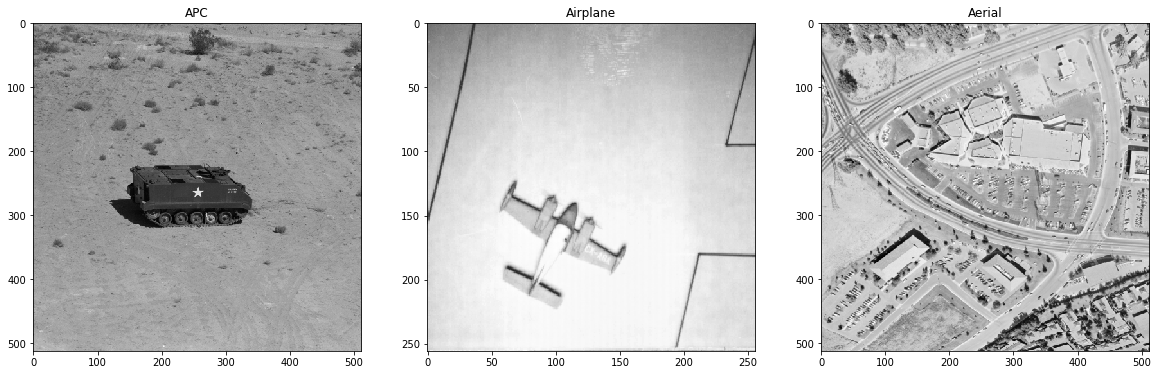

In [5]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(1, 3, 1)
plt.title("APC")
plt.imshow(img_apc, cmap='gray',interpolation='none')

plt.subplot(1, 3, 2)
plt.title("Airplane")
plt.imshow(img_airplane, cmap='gray',interpolation='none')

plt.subplot(1, 3, 3)
plt.title("Aerial")
plt.imshow(img_aerial, cmap='gray',interpolation='none')

## Q2

In [6]:
print("Analysis of APC image:-\n")
minimum_pixel = np.min(img_apc)
maximum_pixel = np.max(img_apc)
print("Maximum pixel value is {} and Minimum value is {} .".format(maximum_pixel, minimum_pixel))

Nbits = int(np.ceil(np.log2(maximum_pixel)))
print("{} bits are used per pixel.".format(Nbits))

Npixels = img_apc.shape[0]*img_apc.shape[1]
print("Resolution of the image is {}x{}, In total of {} pixels are used.".format(img_apc.shape[0], img_apc.shape[1], Npixels))

Analysis of APC image:-

Maximum pixel value is 215 and Minimum value is 12 .
8 bits are used per pixel.
Resolution of the image is 512x512, In total of 262144 pixels are used.


## Q3

In [7]:
import os

csize = os.path.getsize("../misc/5.1.09.tiff")
print("Size of compressed is {} bytes.".format(csize))
print("The compressed image is {}% more than calculated size.".format(((8*csize/(Npixels*Nbits))-1)*100))

Size of compressed is 65670 bytes.
The compressed image is -74.94888305664062% more than calculated size.


## Q4

In [8]:
def get_b_coeff(n, b):
    n >>= b
    return n%2

def display_b_plane(I, b):
    bin_img = I.copy()
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            bin_img[i, j] = get_b_coeff(I[i, j], b)
    plt.imshow(bin_img, cmap='gray')
    plt.title("{} Plane".format(b))
    return 
    

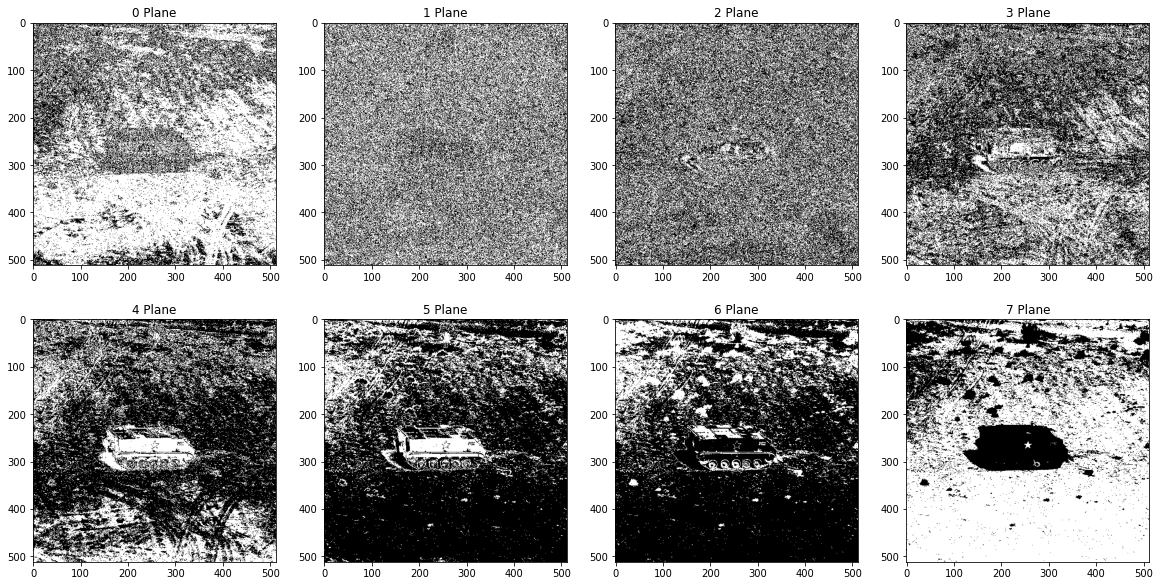

In [9]:
for i in range(Nbits):
    plt.subplot(2, 4, 1+i)
    display_b_plane(img_apc, i)

In [10]:
for i in range(Nbits):
    plt.subplot(2, 4, 1+i)
    display_b_plane(img_airplane, i)

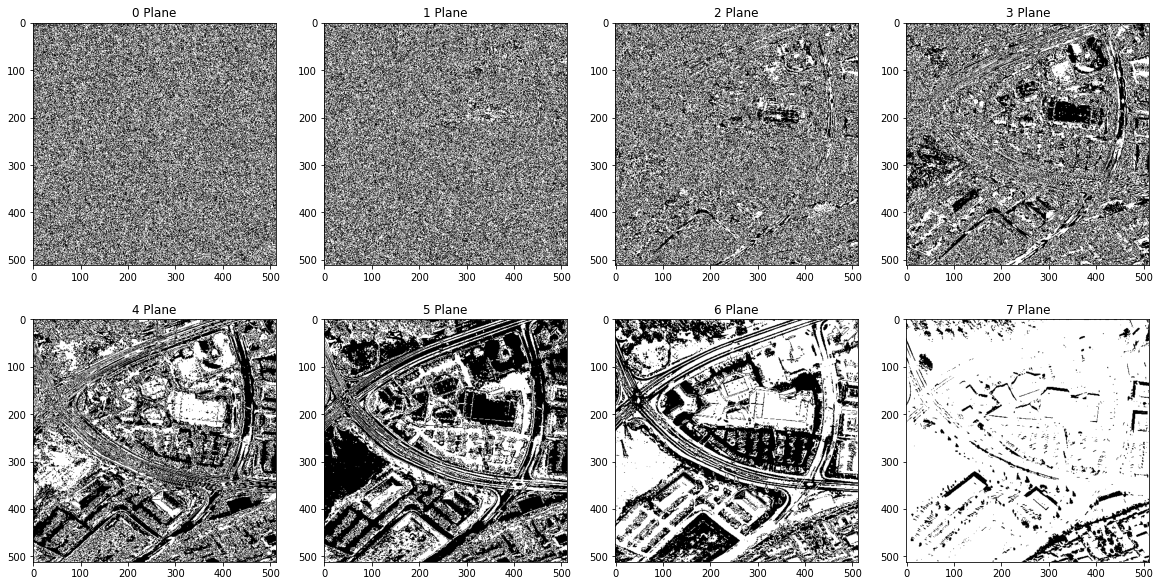

In [11]:
for i in range(Nbits):
    plt.subplot(2, 4, 1+i)
    display_b_plane(img_aerial, i)

# Binary Image Processing

## Q1

In [12]:
def histogram(I, Nbits):
    counter = np.zeros(2**Nbits)
    
    for i in I.ravel():
        counter[i] += 1
    return np.array([np.arange(2**Nbits), counter]) 

Text(0, 0.5, 'Count')

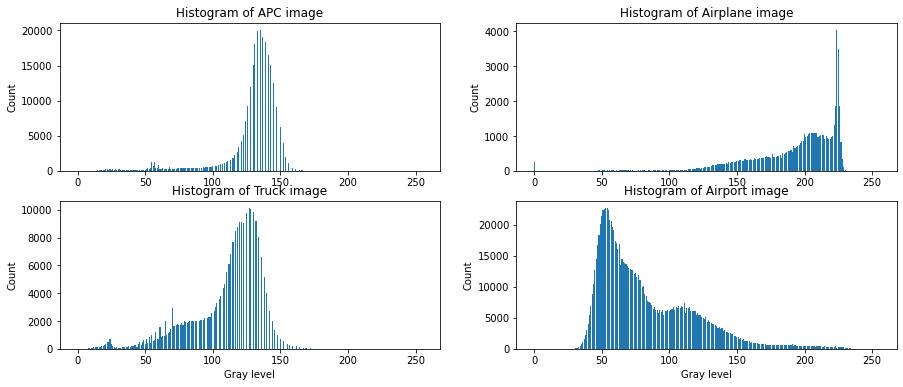

In [13]:
hist_apc = histogram(img_apc, Nbits)
hist_airplane = histogram(img_airplane, Nbits)
hist_airport = histogram(img_airport, Nbits)
hist_truck = histogram(img_truck, Nbits)

plt.rcParams["figure.figsize"] = (15,6)

plt.subplot(2, 2, 1)
plt.title("Histogram of APC image")
plt.bar(hist_apc[0], hist_apc[1])
plt.ylabel("Count")

plt.subplot(2, 2, 2)
plt.title("Histogram of Airplane image")
plt.bar(hist_airplane[0], hist_airplane[1])
plt.ylabel("Count")

plt.subplot(2, 2, 3)
plt.title("Histogram of Truck image")
plt.bar(hist_truck[0], hist_truck[1])
plt.xlabel("Gray level")
plt.ylabel("Count")

plt.subplot(2, 2, 4)
plt.title("Histogram of Airport image")
plt.bar(hist_airport[0], hist_airport[1])
plt.xlabel("Gray level")
plt.ylabel("Count")

## Q2

In [14]:
def thresh(I, T):
    return (I>T).astype(int)

def modal_threshoulding_algo(hist):
    return hist[0, np.argmax(hist[1,:])]

Modal threshoulding results:-
APC:- 135.0
Airplane:- 224.0
Airport:- 54.0
Truck:- 127.0


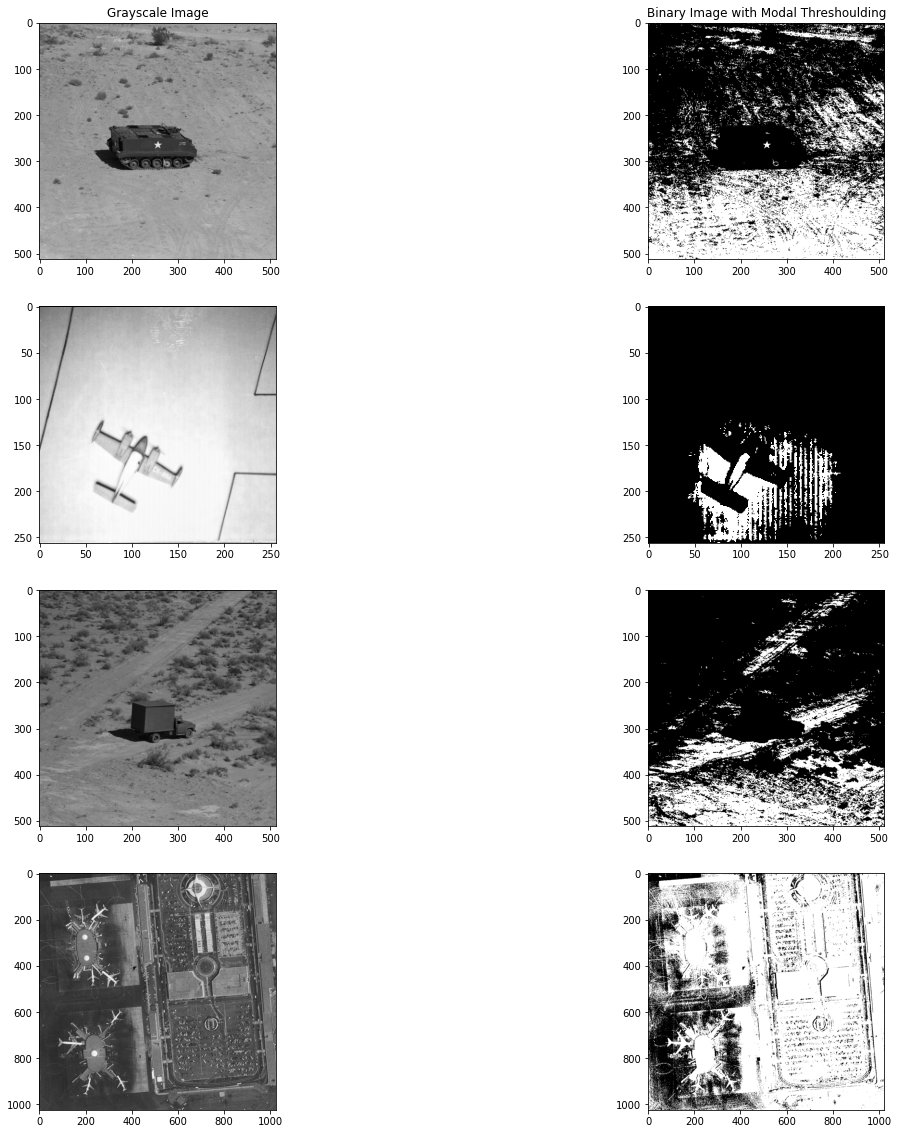

In [16]:
t_apc = modal_threshoulding_algo(hist_apc)
t_airplane = modal_threshoulding_algo(hist_airplane)
t_airport = modal_threshoulding_algo(hist_airport)
t_truck = modal_threshoulding_algo(hist_truck)


bin_img_apc = thresh(img_apc, t_apc)
bin_img_airplane = thresh(img_airplane, t_airplane)
bin_img_airport = thresh(img_airport, t_airport)
bin_img_truck = thresh(img_truck, t_truck)

print("Modal threshoulding results:-")
print("APC:- {}".format(t_apc))
print("Airplane:- {}".format(t_airplane))
print("Airport:- {}".format(t_airport))
print("Truck:- {}".format(t_truck))

plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(4, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_apc, cmap='gray')

plt.subplot(4, 2, 2)
plt.title("Binary Image with Modal Threshoulding")
plt.imshow(bin_img_apc, cmap='gray')

plt.subplot(4, 2, 3)
plt.imshow(img_airplane, cmap='gray')

plt.subplot(4, 2, 4)
plt.imshow(bin_img_airplane, cmap='gray')

plt.subplot(4, 2, 5)
plt.imshow(img_truck, cmap='gray')

plt.subplot(4, 2, 6)
plt.imshow(bin_img_truck, cmap='gray')

plt.subplot(4, 2, 7)
plt.imshow(img_airport, cmap='gray')

plt.subplot(4, 2, 8)
plt.imshow(bin_img_airport, cmap='gray')

## Q3 (a)

In [17]:
def mean(data, counts):
    return np.sum(data*counts)/np.sum(counts)

def var(data, counts):
    m = mean(data, counts)
    return np.sum((np.power(data - m, 2))*counts)/np.sum(counts)

def otsu_algo_a(I, Nbits, plot=False, title=""):
    bin_I = I.copy()
    hist = histogram(I, Nbits)
    pmf = hist[1]/np.sum(hist[1])
    
    intra_class_var = []
    
    gray_level = np.array([i for i in range(2**Nbits)])
    
    for t in range(2**Nbits):
        p0 = np.sum(pmf[0:t])
        p1 = 1-p0
        if(p0 == 0):
            var0 = 0
            var1 = var(gray_level[t:], hist[1, t:])
        elif(p0 == 1):
            var0 = var(gray_level[0:t], hist[1, 0:t])
            var1 = 0
        else:
            var0 = var(gray_level[0:t], hist[1, 0:t])
            var1 = var(gray_level[t:], hist[1, t:])
        intra_class_var.append(p0*var0 + p1*var1)
    t0 = np.argmin(intra_class_var)
    
    if(plot==True):
        plt.rcParams["figure.figsize"] = (8,6)
        
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.bar(hist[0, :t0], hist[1, :t0], color="darkorange")
        ax.bar(hist[0, t0:], hist[1, t0:], color="bisque")
        ax.axvline(x=t0, linestyle="--", color="blueviolet")
        ax.set_xlabel("Gray Level")
        ax.set_ylabel("Count")
        
        ax2 = ax.twinx()
        ax2.plot(hist[0], intra_class_var)
        ax2.plot(t0, intra_class_var[t0], "*r")
        ax2.set_ylabel("Intra Class Variance")
        ax2.text(t0*1.01, 1.05*intra_class_var[t0], r'$\mathbf{t_0}$', fontsize=12)
    
    return (intra_class_var[t0], t0)

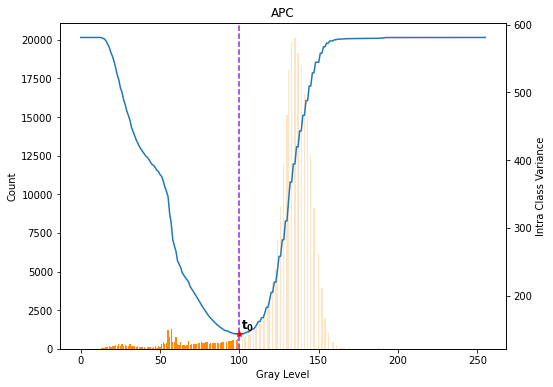

In [18]:
otsu_a_times = []

start = time.time()
var_apc_oa, t_apc_oa = otsu_algo_a(img_apc, Nbits, plot=True, title="APC")
end = time.time()

otsu_a_times.append(end - start)

Optimal threshould is 100 for which intra-class variance is 143.41233392454853.


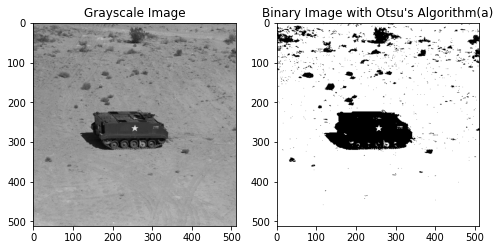

In [19]:
print("Optimal threshould is {} for which intra-class variance is {}.".format(t_apc_oa, var_apc_oa))
bin_img_apc_oa = thresh(img_apc, t_apc_oa)

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_apc, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(a)")
plt.imshow(bin_img_apc_oa, cmap='gray')

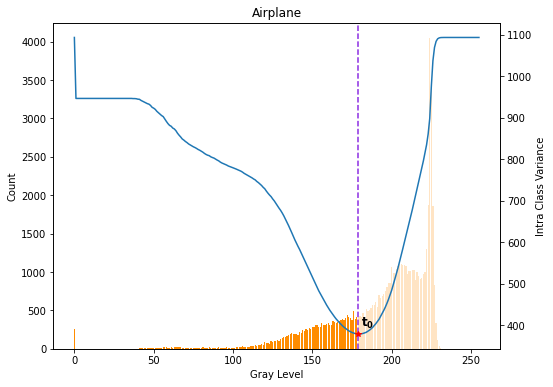

In [20]:
start = time.time()
var_airplane_oa, t_airplane_oa = otsu_algo_a(img_airplane, Nbits, plot=True, title="Airplane")
end = time.time()

otsu_a_times.append(end - start)

Optimal threshould is 179 for which intra-class variance is 379.2686608196306.


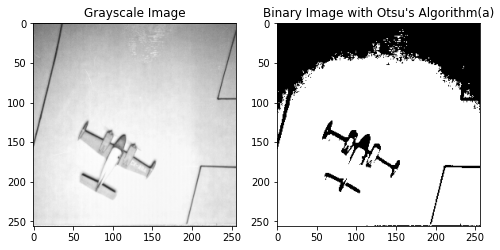

In [21]:
print("Optimal threshould is {} for which intra-class variance is {}.".format(t_airplane_oa, var_airplane_oa))
bin_img_airplane_oa = thresh(img_airplane, t_airplane_oa)

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_airplane, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(a)")
plt.imshow(bin_img_airplane_oa, cmap='gray')

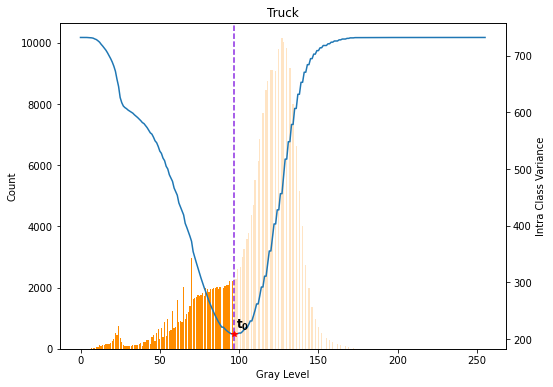

In [22]:
start = time.time()
var_truck_oa, t_truck_oa = otsu_algo_a(img_truck, Nbits, plot=True, title="Truck")
end = time.time()

otsu_a_times.append(end - start)

Optimal threshould is 97 for which intra-class variance is 208.77363353318725.


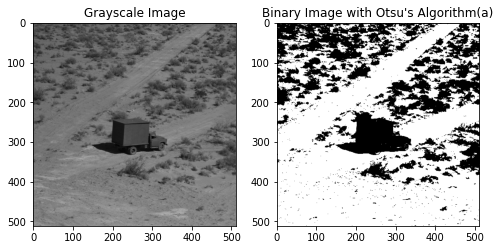

In [23]:
print("Optimal threshould is {} for which intra-class variance is {}.".format(t_truck_oa, var_truck_oa))
bin_img_truck_oa = thresh(img_truck, t_truck_oa)

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_truck, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(a)")
plt.imshow(bin_img_truck_oa, cmap='gray')


In [24]:
start = time.time()
var_airport_oa, t_airport_oa = otsu_algo_a(img_airport, Nbits, plot=True, title="Airport")
end = time.time()

otsu_a_times.append(end - start)

In [25]:
print("Optimal threshould is {} for which intra-class variance is {}.".format(t_airport_oa, var_airport_oa))
bin_img_airport_oa = thresh(img_airport, t_airport_oa)

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_airport, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(a)")
plt.imshow(bin_img_airport_oa, cmap='gray')


Optimal threshould is 96 for which intra-class variance is 370.99647750626684.


## Q3 (b)
Intra-class variance(or Within class Variance) ${\sigma}^2_w = P_0{\sigma}^2_0 + P_1{\sigma}^2_1$\
Intra-class variance(or Within class Variance) ${\sigma}^2_b = P_0{({\mu}_0 - \mu)^2} + P_1{({\mu}_1 - \mu)^2}$\
$\begin{gather*}
{\sigma}^2_b = P_0\left({\mu}_0 - (P_0{\mu_0} + P_1{\mu_1})\right)^2 + P_1\left({\mu}_1 - (P_0{\mu_0} + P_1{\mu_1})\right)^2\\
{\sigma}^2_b = P_0P^2_1({\mu}_0 - {\mu}_1)^2 + P^2_0P_1({\mu}_1 - {\mu}_0)^2\\
\implies \boxed{{\sigma}^2_b = P_0P_1({\mu}_0 - {\mu}_1)^2}
\end{gather*}$

In [58]:
def var_b(P0, mu0, mu1):
    return P0*(1-P0)*np.power(mu0-mu1, 2)
    
def otsu_algo_b(I, Nbits, plot=False, title=""):
    hist = histogram(I, Nbits)
    pmf = hist[1]/np.sum(hist[1])
    total_sum = np.sum(hist[1])
    mu = mean(hist[0], hist[1])

    inter_class_var = []
    
    P0 = 0
    mu0 = 0
    for i in range(2**Nbits):
        prev_P0 = P0
        P0 += pmf[i]
        if(P0 == 0):
            inter_class_var.append(0)
        elif(P0 == 1):
            inter_class_var.append(0)
        else:
            mu0 = (mu0*prev_P0 + i*pmf[i])/P0
            mu1 = (mu - mu0*P0)/(1 - P0)
            inter_class_var.append(var_b(P0, mu0, mu1))
        
        
    t0 = np.argmax(inter_class_var) + 1
    
    if(plot==True):
        plt.rcParams["figure.figsize"] = (8,6)
        
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.bar(hist[0, :t0], hist[1, :t0], color="darkorange")
        ax.bar(hist[0, t0:], hist[1, t0:], color="bisque")
        ax.axvline(x=t0, linestyle="--", color="blueviolet")
        ax.set_xlabel("Gray Level")
        ax.set_ylabel("Count")
        
        ax2 = ax.twinx()
        ax2.plot(hist[0], inter_class_var)
        ax2.plot(t0, inter_class_var[t0], "*r")
        ax2.set_ylabel("Inter Class Variance")
        ax2.text(t0*1.01, 0.95*inter_class_var[t0], r'$\mathbf{t_0}$', fontsize=12)
        
    return (inter_class_var[t0], t0) 

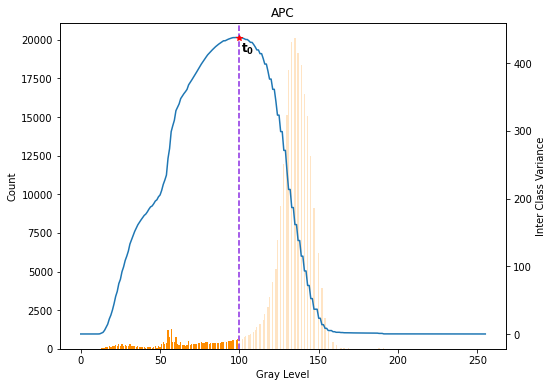

In [59]:
otsu_b_times = []

start = time.time()
var_apc_ob, t_apc_ob = otsu_algo_b(img_apc, Nbits, plot=True, title="APC")
end = time.time()

otsu_b_times.append(end - start)

Optimal threshould is 100 for which black-class variance is 437.67065045828946.


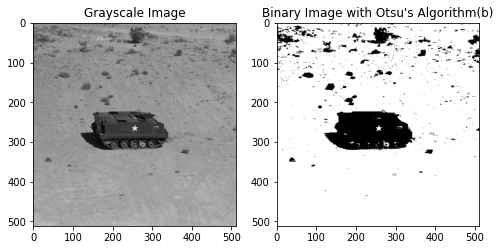

In [60]:
bin_img_apc_ob = thresh(img_apc, t_apc_ob)
print("Optimal threshould is {} for which black-class variance is {}.".format(t_apc_ob, var_apc_ob))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_apc, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(b)")
plt.imshow(bin_img_apc_ob, cmap='gray')

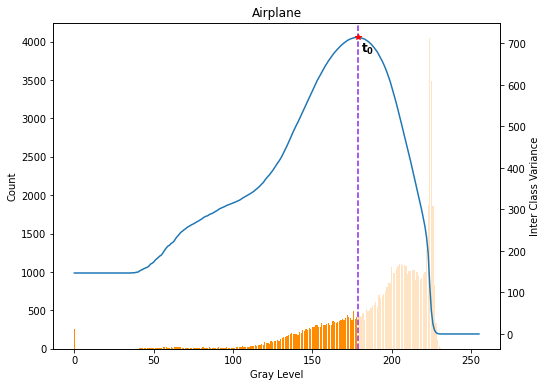

In [61]:
start = time.time()
var_airplane_ob, t_airplane_ob = otsu_algo_b(img_airplane, Nbits, plot=True, title="Airplane")
end = time.time()

otsu_b_times.append(end - start)

In [62]:
bin_img_airplane_ob = thresh(img_airplane, t_apc_ob)
print("Optimal threshould is {} for which inter-class variance is {}.".format(t_airplane_ob, var_airplane_ob))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_airplane, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(b)")
plt.imshow(bin_img_airplane_ob, cmap='gray')

Optimal threshould is 179 for which inter-class variance is 714.4371051958252.


In [63]:
start = time.time()
var_truck_ob, t_truck_ob = otsu_algo_b(img_truck, Nbits, plot=True, title="Truck")
end = time.time()

otsu_b_times.append(end - start)

Optimal threshould is 97 for which inter-class variance is 523.5766219832658.


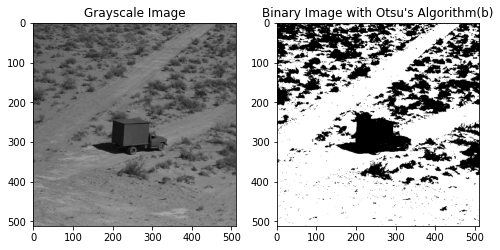

In [64]:
bin_img_truck_ob = thresh(img_truck, t_truck_ob)
print("Optimal threshould is {} for which inter-class variance is {}.".format(t_truck_ob, var_truck_ob))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_truck, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(b)")
plt.imshow(bin_img_truck_ob, cmap='gray')

In [65]:
start = time.time()
var_airport_ob, t_airport_ob = otsu_algo_b(img_airport, Nbits, plot=True, title="Airport")
end = time.time()

otsu_b_times.append(end - start)

Optimal threshould is 96 for which inter-class variance is 886.7713045898263.


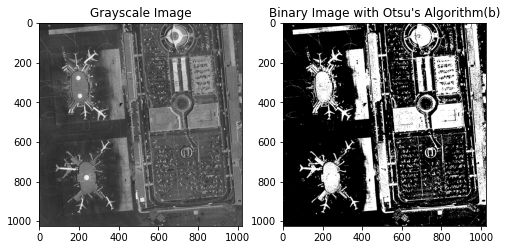

In [66]:
bin_img_airport_ob = thresh(img_airport, t_airport_ob)
print("Optimal threshould is {} for which inter-class variance is {}.".format(t_airport_ob, var_airport_ob))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(img_airport, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image with Otsu's Algorithm(b)")
plt.imshow(bin_img_airport_ob, cmap='gray')

## Comparision between Otsu's implementations

In [67]:
import pandas as pd

images = ["APC", "Airplane", "Truck", "Airport"]
otsu_a_thresh = [t_apc_oa, t_airplane_oa, t_truck_oa, t_airport_oa]
otsu_b_thresh = [t_apc_ob, t_airplane_ob, t_truck_ob, t_airport_ob]

df = pd.DataFrame({"Image":images, "Otsu(a) Thresh":otsu_a_thresh, "Otsu(a) Time(in s)":otsu_a_times, "Otsu(b) Thresh":otsu_b_thresh, "Otsu(b) Time(in s)":otsu_b_times}, index=None)
display(df)

Image  Otsu(a) Thresh  Otsu(a) Time(in s)  Otsu(b) Thresh  \
0       APC             100            0.364835             100   
1  Airplane             179            0.264028             179   
2     Truck              97            0.394193              97   
3   Airport              96            0.974936              96   

   Otsu(b) Time(in s)  
0            0.362346  
1            0.246338  
2            0.372363  
3            0.989875

## Q4

In [68]:
def complement(bin_I):
    c_bin_I = bin_I.copy()
    for i in range(c_bin_I.shape[0]):
        for j in range(c_bin_I.shape[1]):
            c_bin_I[i, j] = 1 - c_bin_I[i, j]
    return c_bin_I

def connected_component(bin_I):
    R = np.zeros(bin_I.shape)
    k = 1
    for i in range(bin_I.shape[0]):
        for j in range(bin_I.shape[1]):
            if(i == 0 and j == 0):
                if(bin_I[0, 0] == 1):
                    R[i, j] = k
                    k += 1
            elif(i == 0):
                if(bin_I[i, j-1] == 1 and bin_I[i, j] == 1):
                    R[i, j] = R[i, j-1]
                elif(bin_I[i, j] == 1):
                    R[i, j] = k
                    k += 1
            elif(j == 0):
                if(bin_I[i-1, j] == 1 and bin_I[i, j] == 1):
                    R[i, j] = R[i-1, j]
                elif(bin_I[i, j] == 1):
                    R[i, j] = k
                    k += 1
            else:
                if(bin_I[i, j] == 1):
                    if(bin_I[i-1, j] == 1 and bin_I[i, j-1] == 1):
                        if(R[i-1, j] != R[i, j-1]):
                            R[i, j] = min(R[i-1, j], R[i, j-1])
                        else:
                            R[i, j] = min(R[i-1, j], R[i, j-1])
                    elif(bin_I[i-1, j] == 1):
                        R[i, j] = R[i-1, j]
                    elif(bin_I[i, j-1] == 1):
                        R[i, j] = R[i, j-1]
                    else:
                        R[i, j] = k
                        k += 1
    return R

In [79]:
R_apc = connected_component(bin_img_apc_oa)
R_airplane = connected_component(bin_img_airplane_oa)
R_truck = connected_component(bin_img_truck_oa)
R_airport = connected_component(bin_img_airport_oa)

plt.rcParams["figure.figsize"] = (10,15)
plt.subplot(4, 2, 1)
plt.title("Complement Image")
plt.imshow(bin_img_apc_oa, cmap="gray")
plt.subplot(4, 2, 3)
plt.imshow(bin_img_airplane_oa, cmap="gray")
plt.subplot(4, 2, 5)
plt.imshow(bin_img_truck_oa, cmap="gray")
plt.subplot(4, 2, 7)
plt.imshow(bin_img_airport_oa, cmap="gray")


plt.subplot(4, 2, 2)
plt.title("Labelled image")
plt.imshow(255*R_apc/np.max(R_apc))
plt.subplot(4, 2, 4)
plt.imshow(255*R_airplane/np.max(R_airplane))
plt.subplot(4, 2, 6)
plt.imshow(255*R_truck/np.max(R_truck))
plt.subplot(4, 2, 8)
plt.imshow(255*R_airport/np.max(R_airport))

## Q5

In [ ]:
(label, area) = np.unique(R, return_counts=True)

In [ ]:
plt.plot(label[2:], area[2:])

In [ ]:
def minor_blob_removal(I, R, m):
    new_I = I.copy()
    for i in range(new_I.shape[0]):
        for j in range(new_I.shape[1]):
            if(new_I[i, j]==0 and R[i, j]==m):
                new_I[i, j] = 1
    return new_I

In [ ]:
mbr_img = minor_blob_removal(bin_img, R, 1)
for i in range(2, 200):
    mbr_img = minor_blob_removal(mbr_img, R, i)

In [ ]:
plt.subplot(1, 2, 1)
plt.title("Before Minor blob removal")
plt.imshow(bin_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("After Minor blob removal")
plt.imshow(mbr_img, cmap="gray")